In [ ]:
# Human segmentation
# 1. 사람대상 인물모드
# 2. 고양이 대상 인물모드
# 3. 배경 바꾸기

In [ ]:
#1. 사람대상 인물모드

In [2]:
# 실습을 위한 폴더 만들
! mkdir -p ~/work/human_segmentation/models
! mkdir -p ~/work/human_segmentation/images
! ln -s ~/data/* ~/work/human_segmentation/images

ln: failed to create symbolic link '/home/jovyan/work/human_segmentation/images/my_image.png': File exists


In [1]:
! pip install opencv-python pixellib # 다시 시작이 요구될 수 있습니다.

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 70.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 69.8 MB/s eta 0:00:00:00:0100:01
  DEPRECATION: Building 'fvcore' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` o

In [2]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt
import os

print(cv2.__version__)

# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# torch: PyTorch. 딥러닝 및 텐서 연산을 위한 라이브러리. 인공지능 모델을 만들거나 불러와 추론하는 도구
# torchvision: 이미지 변환 및 전처리를 위한 torchvision의 transform 모듈
# deeplabv3_resnet101: 사전 학습된 DeepLabV3 모델. 이미지를 분류하도록 학습된 모델
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

4.11.0


이미지 크기: (4000, 3000, 3)


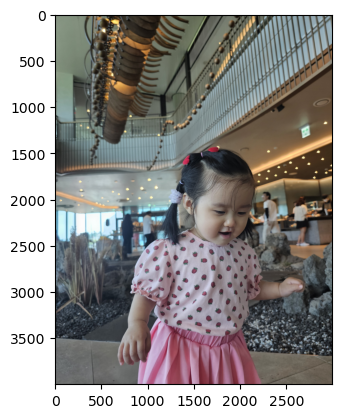

In [3]:
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/human_segmentation/images/my_image.png")
img_orig = cv2.imread(img_path)

print(f"이미지 크기: {img_orig.shape}")

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# DeepLab 모델을 준비하겠습니다. 아까 준비한 Torchvision을 이용하면 편하게 사용할 수 있습니다.

# deeplabv3_resnet101
# 먼저 Torchvision에서 제공해 주는 모델을 다운로드

model = deeplabv3_resnet101(pretrained=True).eval()

/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /home/jovyan/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


100%|██████████| 233M/233M [00:05<00:00, 44.4MB/s] 


In [7]:
# 이미지 처리 인공지능 모델 중 사전 학습된 모델은 모델의 전처리 방식과 입력 크기 등이 사전 학습에 사용한 것과 동일하게 사용해야합니다.
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])

In [8]:
# 인공지능 모델 중 여러 데이터를 동시에(batch) 처리하는 것을 상정하는 경우 배치(batch) 차원을 추가해주어야합니다.
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [9]:
%%time
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

CPU times: user 9.13 s, sys: 296 ms, total: 9.43 s
Wall time: 9.56 s


In [10]:
# segmentAsPascalvoc라는 함수는  PASCAL VOC 데이터로 학습된 모델을 이용
# 모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요
# PASCAL VOC 데이터의 라벨 종류확인

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 'person'의 라벨은 15, 즉 15를 가진 여역만 검

21

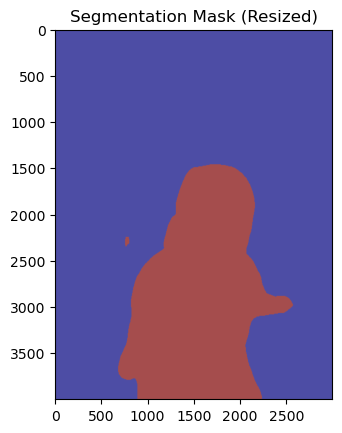

In [11]:
# 사람만 검출

plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [12]:
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([ 0, 15], dtype=uint8)

In [13]:
for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

background
person


In [14]:
# output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요. segvalues에는 class_ids와 masks가 있습니다. class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

# 이제 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내면 될 것 같습니다.
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생성 코드 결과물이예요!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [17]:
# 사람을 나타내는 15번째 색상
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

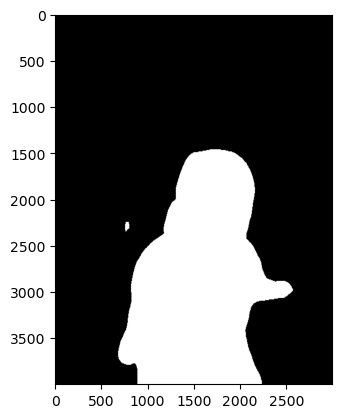

In [18]:
# output의 픽셀 별로 예측된 class가 사람이라면 1(True), 다르다면 0(False)이 됩니다
# 1과 0에 각각 255를 곱하였으므로 사람으로 예측된 픽셀은 255, 그렇지 않은 픽셀은 0
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 15)  # 클래스 ID 15 (사람)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

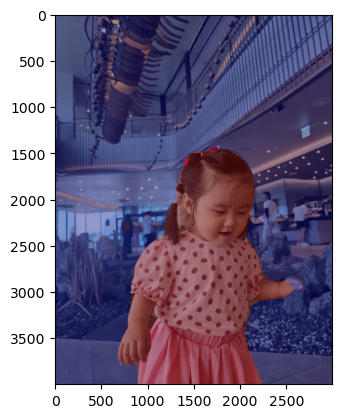

In [19]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

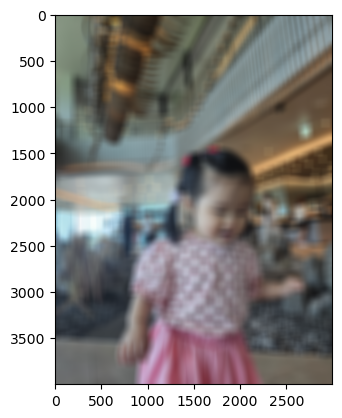

In [20]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (100, 100))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.blur(img_orig, (13,13))의 숫자만 바꾸면 이미지 전체가 더 세게/덜 세게 흐려질수 있

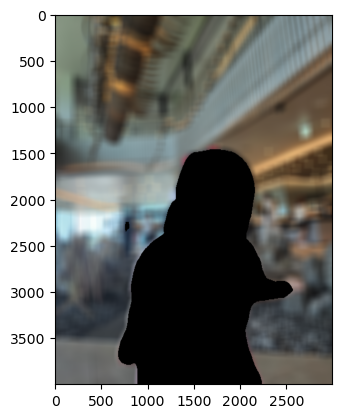

In [21]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


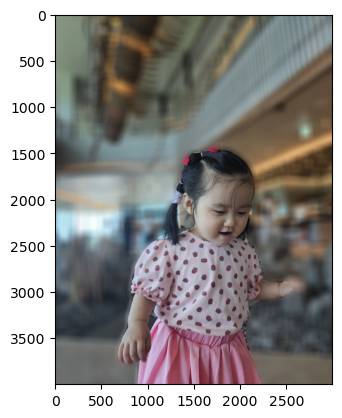

In [22]:
#  흐린 배경과 원본 영상 합성

# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

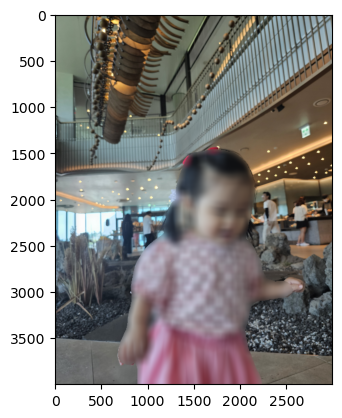

In [23]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

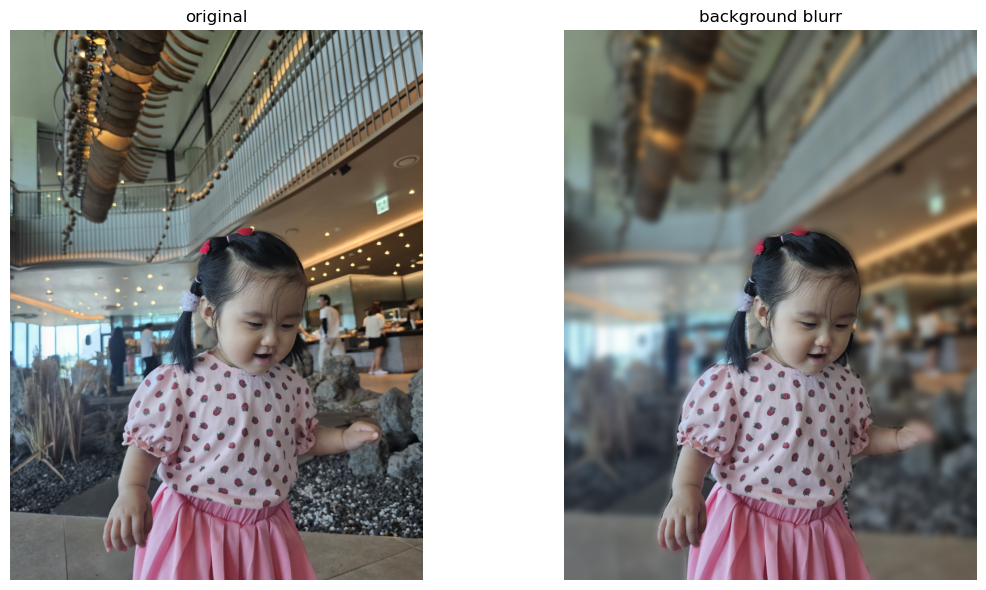

In [25]:
# 비교 
import cv2, numpy as np
import matplotlib.pyplot as plt

# (선택) 배경 블러 & 합성 만들기 — 이미 있다면 이 블록은 건너뛰세요
# ------------------------------------------------------------
# 배경을 강하게 블러
img_bg_blur = cv2.GaussianBlur(img_orig, (0, 0), 25)

# 마스크가 3채널이면 1채널로 변환
mask = img_mask_color
if mask.ndim == 3:
    mask = mask[:, :, 0]

# 합성: 마스크(255=전경)는 원본, 그 외는 블러
img_concat = np.where(mask[..., None] == 255, img_orig, img_bg_blur)
# ------------------------------------------------------------

# 좌우 비교 표시
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('background blurr')
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


문제점: (993, 1745, 3)


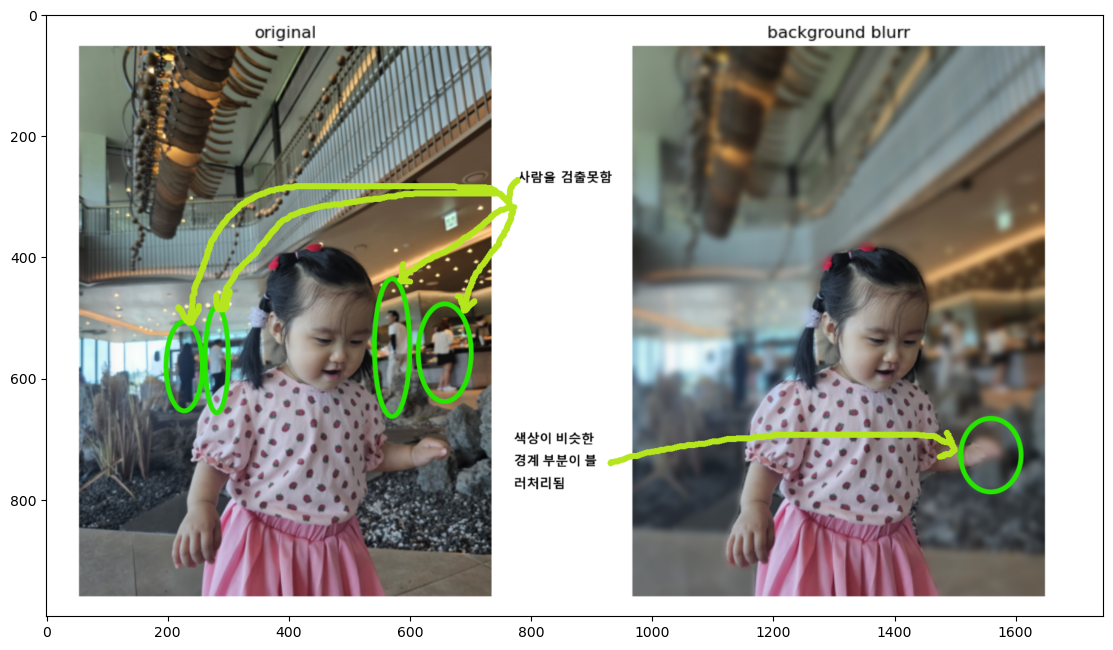

In [33]:
# 문제점
problem_img_path = "/home/jovyan/work/human_segmentation/images/problem.png"
problem_img = cv2.imread(problem_img_path)

problem_img = cv2.cvtColor(problem_img, cv2.COLOR_BGR2RGB)


print(f"문제점: {problem_img.shape}")

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(problem_img)

plt.show()

In [ ]:
# DeepLabV3+ (deeplabv3_resnet101) 모델을 사용하여 이미지에서 '사람(person)' 영역을 분할하는 Semantic Segmentation 작업의 문제점

# 두 가지 문제(뒤의 사람 미검출 및 손 경계의 배경 인식)는 Semantic Segmentation 모델에서 흔히 발생하는 문제입니다.

# 뒤의 사람 미검출 (같은 클래스 내 개별 객체 분리 불가):

#원인: DeepLabV3+와 같은 Semantic Segmentation 모델은 이미지의 각 픽셀에 대해 해당 픽셀이 어떤 **클래스(예: 사람, 자전거, 배경 등)**에 속하는지를 분류합니다. 즉, 이미지에 여러 명의 사람이 있더라도 이들을 개별적인 인스턴스로 구분하지 않고 모두 '사람' 클래스로 묶어 하나의 마스크로 처리합니다. 뒤의 사람이 잘 분할되지 않은 것은 모델의 정확도나 학습 데이터의 한계일 수 있지만, 근본적으로는 여러 객체를 개별로 분리하는 작업이 아닙니다.

#해결책: 개별 객체를 구분하려면 Instance Segmentation(인스턴스 분할) 모델을 사용해야 합니다.

# Mask R-CNN, YOLOv8-seg, Detectron2 등: 이 모델들은 객체 검출(Object Detection)과 Semantic Segmentation을 결합하여 이미지 내의 각 객체(인스턴스)를 개별적으로 식별하고 분할 마스크를 생성합니다.

# 손 경계의 배경 인식 (객체 경계 부분의 낮은 정확도):

# 원인: Semantic Segmentation 모델은 다운샘플링 과정(풀링, 스트라이드 컨볼루션 등)을 통해 특징 해상도가 낮아지면서 공간 정보(Spatial Information)를 손실하는 경향이 있습니다. 특히 복잡하거나 작은 객체의 경계(Edge) 부분에서 픽셀 정확도가 떨어져 경계를 부드럽게 처리하거나 배경으로 오인식하기 쉽습니다. DeepLabV3+는 이 문제를 완화하기 위해 인코더-디코더 구조를 도입하고 저수준 특징(low-level features)을 활용하지만, 여전히 경계 오류가 발생할 수 있습니다.

# 해결책:

# 모델 개선 (DeepLabV3+의 디코더 강화): DeepLabV3+의 디코더 부분을 개선하거나, 경계(Boundary) 정보를 명시적으로 활용하는 **추가 모듈(예: Attention Mechanism, Boundary Loss)**을 모델에 통합하여 경계 분할 정확도를 높일 수 있습니다.

# 데이터셋: 현재 모델이 PASCAL VOC 데이터로 학습되었는데, 이 데이터셋은 사람 손과 같이 미세한 경계를 가진 객체에 대한 레이블이 충분히 정교하지 않을 수 있습니다. 더 크고 경계 레이블이 정교한 데이터셋(예: COCO-Stuff, Cityscapes 등)으로 모델을 Fine-tuning 하면 정확도를 높일 수 있습니다.

# 후처리(Post-processing): 출력 마스크에 대해 **조건부 랜덤 필드(Conditional Random Fields, CRF)**와 같은 기술을 적용하여 마스크 경계를 세부적으로 다듬을 수 있습니다.

추론 시간: 9.4831 초


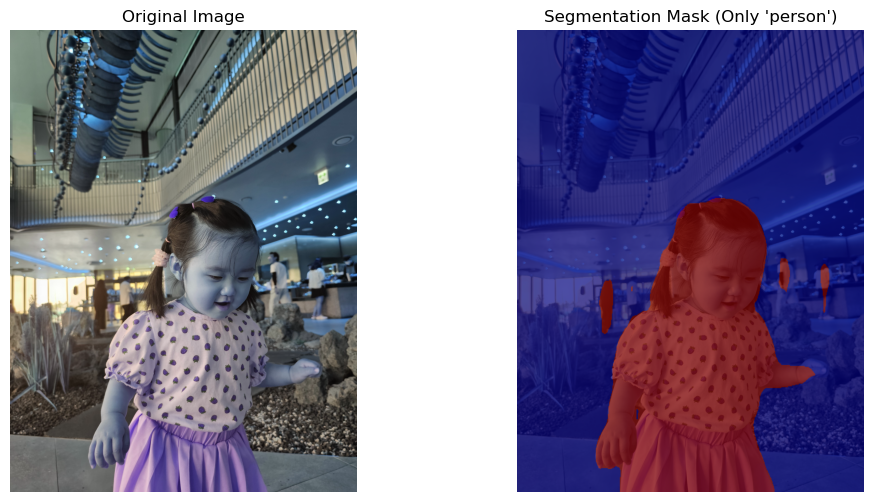

In [8]:
# 해결책(gemini)
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import numpy as np
import cv2
import matplotlib.pyplot as plt

# PASCAL VOC 데이터의 라벨 종류
# 'person'의 라벨은 15
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    'train', 'tv'
]
PERSON_LABEL = 15 # 'person' 라벨 인덱스

# 1. 모델 준비 및 다운로드
# 사전 학습된 DeepLabV3-ResNet101 모델 사용
# .eval()로 추론 모드 설정 (Dropout, BatchNorm을 비활성화)
model = deeplabv3_resnet101(pretrained=True).eval()

# 2. 이미지 로드 및 전처리 (예시를 위해 더미 이미지 생성/로드 코드 추가 필요)
# 실제 이미지 로드 코드는 아래와 같이 작성되어야 함
# img_orig = cv2.imread('your_image_path.jpg')
# img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB) # BGR을 RGB로 변환 (모델 입력 형식)

# --- 더미 이미지 생성 (실제 사용 시 대체 필요) ---
# 예시를 위해 520x520 검은색 이미지에 100x100 흰색 사각형 추가
dummy_img = np.zeros((600, 800, 3), dtype=np.uint8)
# 여기에 실제 이미지를 로드하는 코드를 넣으세요.
# 예시: img_orig = cv2.imread('your_image.jpg')
# img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/human_segmentation/images/my_image.png")
img_orig = cv2.imread(img_path)

# ---------------------------------------------


# 모델 전처리 방식과 입력 크기 등이 사전 학습에 사용한 것과 동일해야 함
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)), # 모델 입력 크기 (고정)
    T.ToTensor(),
    # Torchvision 사전 학습 모델의 표준 정규화 (ImageNet 기준)
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. 입력 텐서 준비
# cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)가 이미 원본 코드에 있으므로,
# 실제로는 이미지를 RGB로 로드하거나 cvtColor를 사용해야 합니다.
# 인공지능 모델은 배치(batch) 처리를 상정하므로 배치 차원(unsqueeze(0))을 추가
input_tensor = transform(img_orig).unsqueeze(0)

# 4. 모델 추론
# %%time (Jupyter/Colab 환경에서만 동작)
import time
start_time = time.time()

with torch.no_grad():
    # 모델의 출력은 { 'out': 텐서, 'aux': 텐서 } 형태의 Dictionary
    # "out"은 메인 출력을 나타내며, [0]은 배치 차원 제거 (여기선 1개)
    output = model(input_tensor)["out"][0]

# 추론 시간 측정 종료
end_time = time.time()
print(f"추론 시간: {end_time - start_time:.4f} 초")

# 5. 결과 후처리 및 마스크 생성
# 각 픽셀에 대한 가장 높은 확률을 가진 클래스 인덱스 선택
output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize (cv2.INTER_NEAREST는 경계선 유지에 유리)
output_predictions_resized = cv2.resize(
    output_predictions,
    (img_orig.shape[1], img_orig.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

# 6. 사람 영역(PERSON_LABEL: 15)만 검출
# 'person' 라벨(15)을 가진 영역만 True (1)로 설정하고 나머지는 False (0)
person_mask = (output_predictions_resized == PERSON_LABEL)

# 7. 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_orig)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
# 원본 이미지 위에 사람 마스크를 투명하게 겹쳐서 표시
plt.imshow(img_orig)
# 사람 영역(person_mask)에 대해서만 마스크를 표시
# cmap="jet"으로 색상 맵 설정, alpha=0.7로 투명도 설정
masked_img = np.zeros_like(img_orig)
masked_img[person_mask] = img_orig[person_mask]

# 마스크만 표시: person_mask를 플롯하고, 배경은 무시
# 경계를 강조하기 위해 원본 코드를 유지하면서 마스크를 겹쳐 그리는 방식
plt.imshow(person_mask, cmap="jet", alpha=0.7)
plt.title(f"Segmentation Mask (Only '{LABEL_NAMES[PERSON_LABEL]}')")
plt.axis('off')

plt.show()

# 멀리있는 사람은 잘 골라 냄. 손은 여전히 블러처리됨

In [ ]:
# 2. 고양이 대상 인물모드

이미지 크기: (183, 275, 3)


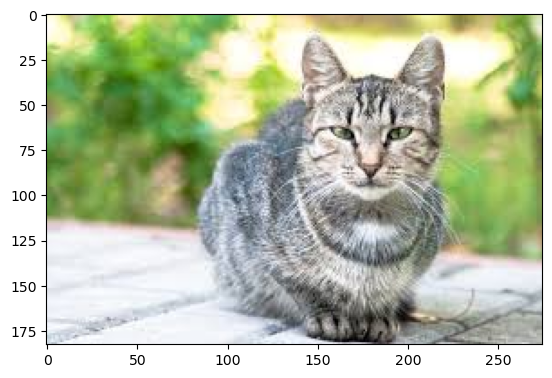

In [16]:
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/human_segmentation/images/cat3.jpg")
img_orig = cv2.imread(img_path)

print(f"이미지 크기: {img_orig.shape}")

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# DeepLab 모델을 준비하겠습니다. 아까 준비한 Torchvision을 이용하면 편하게 사용할 수 있습니다.

# deeplabv3_resnet101
# 먼저 Torchvision에서 제공해 주는 모델을 다운로드

model = deeplabv3_resnet101(pretrained=True).eval()

/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /home/jovyan/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


100%|██████████| 233M/233M [00:03<00:00, 80.2MB/s] 


In [19]:
# 이미지 처리 인공지능 모델 중 사전 학습된 모델은 모델의 전처리 방식과 입력 크기 등이 사전 학습에 사용한 것과 동일하게 사용해야합니다.
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])

In [20]:
# 인공지능 모델 중 여러 데이터를 동시에(batch) 처리하는 것을 상정하는 경우 배치(batch) 차원을 추가해주어야합니다.
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [21]:
%%time
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

CPU times: user 8.96 s, sys: 298 ms, total: 9.26 s
Wall time: 9.31 s


In [22]:
# segmentAsPascalvoc라는 함수는  PASCAL VOC 데이터로 학습된 모델을 이용
# 모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요
# PASCAL VOC 데이터의 라벨 종류확인

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 'cat'의 라벨은 8, 즉 8을 가진 여역만 검출

21

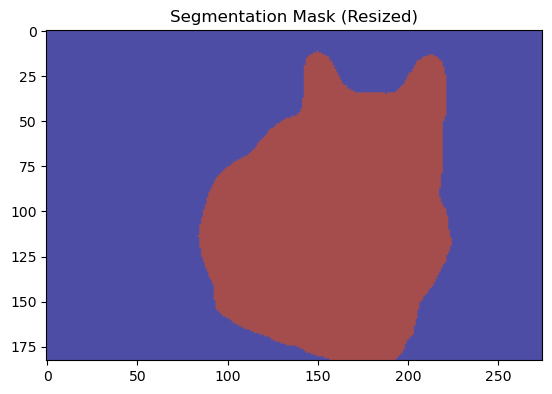

In [23]:
# 고양이만 검출

plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [24]:
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([0, 8], dtype=uint8)

In [25]:
# output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요. segvalues에는 class_ids와 masks가 있습니다. class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

# 이제 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내면 될 것 같습니다.
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생성 코드 결과물이예요!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [27]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

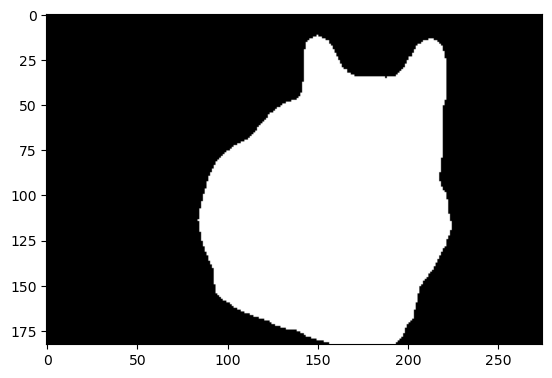

In [29]:
# output의 픽셀 별로 예측된 class가 사람이라면 1(True), 다르다면 0(False)이 됩니다
# 1과 0에 각각 255를 곱하였으므로 사람으로 예측된 픽셀은 255, 그렇지 않은 픽셀은 0
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 8)  # 클래스 ID 8 (고양이)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

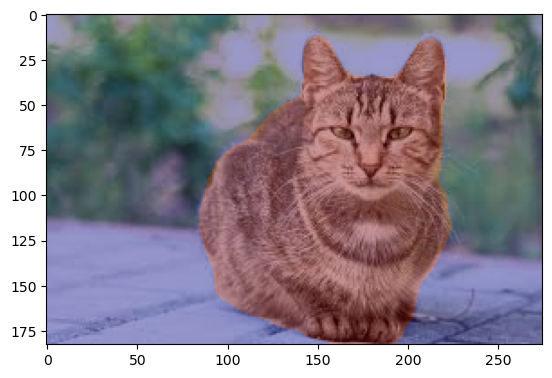

In [30]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

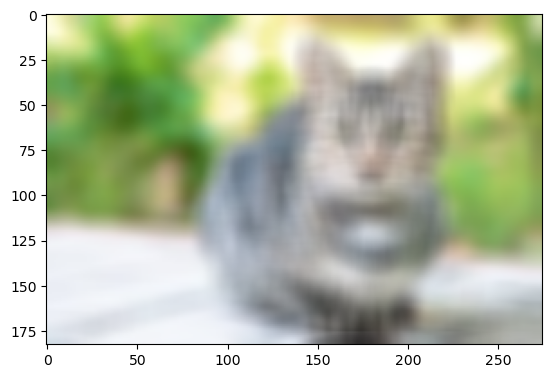

In [31]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

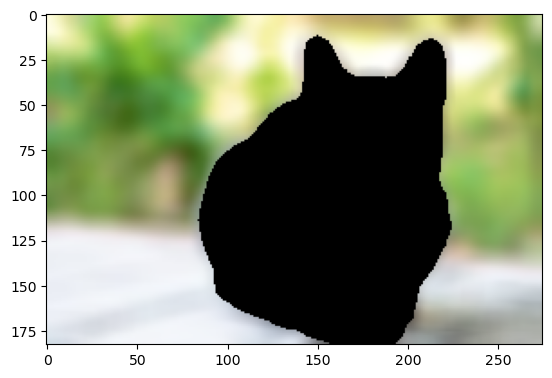

In [32]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

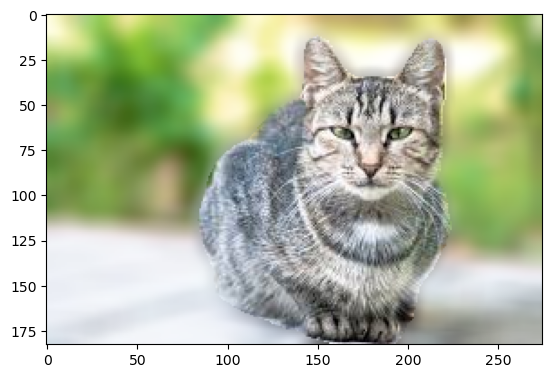

In [33]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

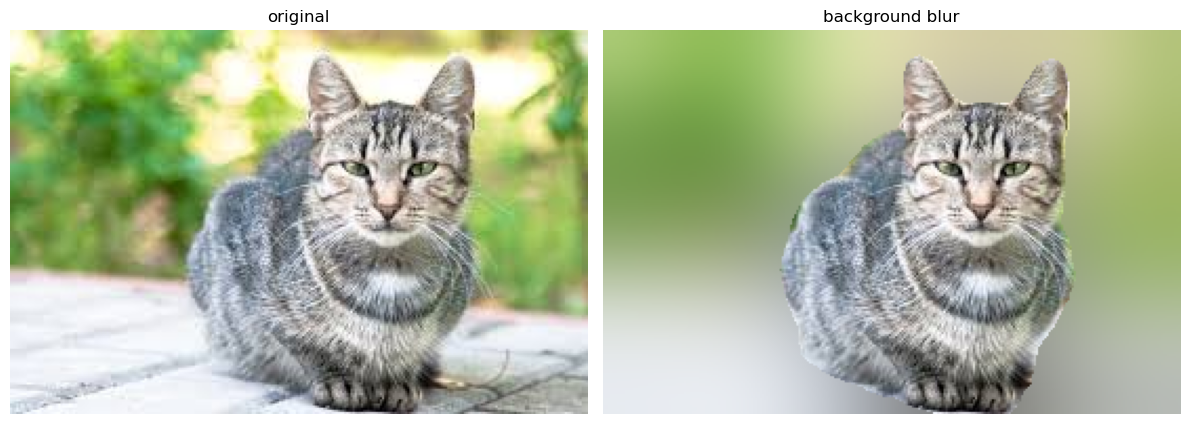

In [35]:
# 비교 
import cv2, numpy as np
import matplotlib.pyplot as plt

# (선택) 배경 블러 & 합성 만들기 — 이미 있다면 이 블록은 건너뛰세요
# ------------------------------------------------------------
# 배경을 강하게 블러
img_bg_blur = cv2.GaussianBlur(img_orig, (0, 0), 25)

# 마스크가 3채널이면 1채널로 변환
mask = img_mask_color
if mask.ndim == 3:
    mask = mask[:, :, 0]

# 합성: 마스크(255=전경)는 원본, 그 외는 블러
img_concat = np.where(mask[..., None] == 255, img_orig, img_bg_blur)
# ------------------------------------------------------------

# 좌우 비교 표시
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('background blur')
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#3. 고양이 배경 합성 크로 마키

원본 고양이 이미지 크기: (183, 275, 3)
배경(사막) 이미지 크기: (375, 600, 3)


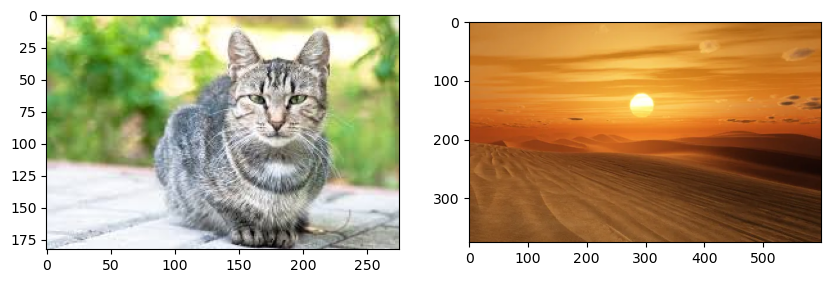

In [10]:
cat_img_path = "/home/jovyan/work/human_segmentation/images/cat3.jpg"  # 고양이 이미지를 준비해주세요
sand_img_path = "/home/jovyan/work/human_segmentation/images/sand.png"  # 사막 배경 이미지를 준비해주세요

cat_img = cv2.imread(cat_img_path)
sand_img = cv2.imread(sand_img_path)

cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
sand_img = cv2.cvtColor(sand_img, cv2.COLOR_BGR2RGB)

print(f"원본 고양이 이미지 크기: {cat_img.shape}")
print(f"배경(사막) 이미지 크기: {sand_img.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cat_img)

plt.subplot(1, 2, 2)
plt.imshow(sand_img)

plt.show()

In [11]:
model = deeplabv3_resnet101(pretrained=True).eval()

transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기
    T.ToTensor(),
])

input_tensor = transform(cat_img).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

print(f"추론 마스크 크기 (Before Resize): {output_predictions.shape}")

추론 마스크 크기 (Before Resize): (520, 520)


In [12]:
# 마스크를 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (cat_img.shape[1], cat_img.shape[0]), interpolation=cv2.INTER_NEAREST)

print(f"추론 마스크 크기 (After Resize): {output_predictions_resized.shape}")

추론 마스크 크기 (After Resize): (183, 275)


In [13]:
unique_classes = np.unique(output_predictions_resized)
print(f"예측된 클래스 ID: {unique_classes}")

예측된 클래스 ID: [0 8]


In [14]:
# segmentAsPascalvoc라는 함수는  PASCAL VOC 데이터로 학습된 모델을 이용
# 모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요
# PASCAL VOC 데이터의 라벨 종류확인

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 'person'의 라벨은 15, 즉 15를 가진 여역만 검

21

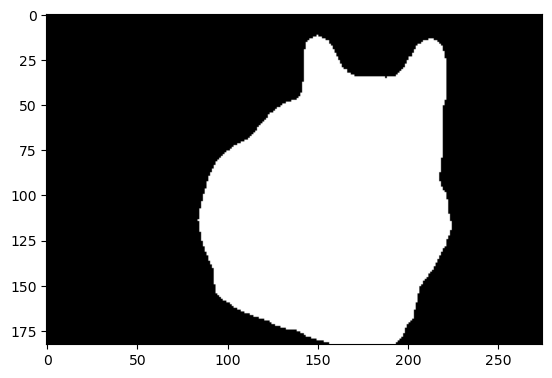

In [15]:
target_class_id = unique_classes[-1]

seg_map = (output_predictions_resized == target_class_id)
img_mask = seg_map.astype(np.uint8) * 255

plt.imshow(img_mask, cmap='gray')
plt.show()

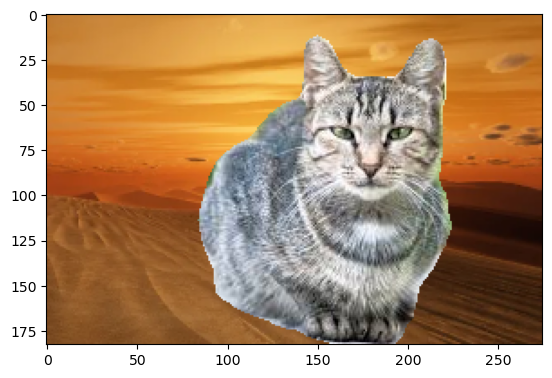

In [25]:
# 배경을 고양이 이미지 크기에 맞춤
sand_img_resized = cv2.resize(sand_img, (cat_img.shape[1], cat_img.shape[0]))

# 고양이 부분만 남기고 배경 적용
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)  # 3채널 변환
result_img = np.where(img_mask_color == 255, cat_img, sand_img_resized)  # 마스크 기반 합성

plt.imshow(result_img)
plt.show()

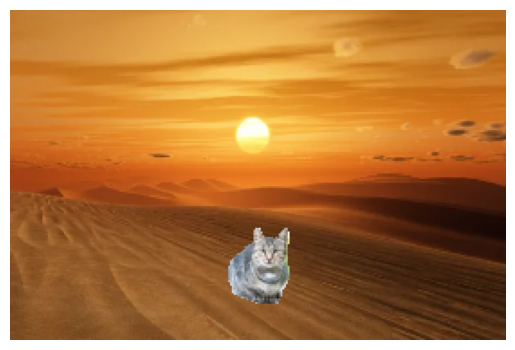

In [31]:
# 사막대비 고양이가 커서 현실감 떨어지는 문제때문에 고양이를 축소
# 1) 색 뒤틀림 방지(RGB/BGR 정리)
# 2) 고양이 크기를 비율로 자동 조정(권장) 또는 고정 스케일로 축소
# 3) 바닥 중앙 배치


import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------- 입력 보조 ----------
def load_rgb(path):
    """파일 경로에서 RGB(uint8)로 읽기"""
    return np.array(Image.open(path).convert("RGB"))

def ensure_uint8_rgb(arr):
    """이미 메모리에 있는 이미지를 RGB uint8로 정리"""
    img = np.array(arr)
    if img.ndim == 2:  # grayscale -> RGB
        img = np.stack([img, img, img], axis=-1)
    if img.dtype != np.uint8:
        if img.max() <= 1.0:
            img = (img * 255.0).clip(0, 255).astype(np.uint8)
        else:
            img = img.astype(np.uint8)
    return img

# ---------- 핵심 합성 함수들 ----------
def place_cat_bottom_by_frac(cat_img, sand_img, img_mask,
                             max_w_frac=0.20, max_h_frac=0.28, bottom_margin=20):
    """
    고양이 최종 너비/높이가 캔버스의 일정 비율을 넘지 않도록 자동 축소 후 바닥 중앙 배치.
    - max_w_frac, max_h_frac: 작게 하려면 값을 더 낮추세요 (예: 0.18, 0.24 등)
    """
    # 1) RGB 정리 후 처리용 BGR로 변환
    cat_rgb  = ensure_uint8_rgb(cat_img)
    sand_rgb = ensure_uint8_rgb(sand_img)
    cat_bgr  = cv2.cvtColor(cat_rgb,  cv2.COLOR_RGB2BGR)
    sand_bgr = cv2.cvtColor(sand_rgb, cv2.COLOR_RGB2BGR)

    # 2) 캔버스 크기 맞추기
    H, W = cat_bgr.shape[:2]
    bg = cv2.resize(sand_bgr, (W, H), interpolation=cv2.INTER_LINEAR)

    # 3) 마스크 준비(단일채널 0/255)
    if img_mask.ndim == 3:
        mask_gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
    else:
        mask_gray = img_mask.copy()
    _, mask_bin = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)

    # 흰색이 거의 전부면 반전(흰=전경이 되도록)
    if (mask_bin > 0).mean() > 0.9:
        mask_bin = cv2.bitwise_not(mask_bin)

    # 4) 고양이 ROI 추출
    pts = cv2.findNonZero(mask_bin)
    if pts is None:
        raise ValueError("마스크에서 전경(고양이)을 찾지 못했습니다.")
    x, y, w, h = cv2.boundingRect(pts)
    cat_roi, mask_roi = cat_bgr[y:y+h, x:x+w], mask_bin[y:y+h, x:x+w]

    # 5) 목표 비율로 스케일 계산(더 작게 하려면 max_*_frac 낮추기)
    target_w = max(1, int(W * max_w_frac))
    target_h = max(1, int(H * max_h_frac))
    scale = min(target_w / w, target_h / h)
    nw, nh = max(1, int(w * scale)), max(1, int(h * scale))

    # 6) 축소
    cat_small  = cv2.resize(cat_roi,  (nw, nh), interpolation=cv2.INTER_AREA)
    mask_small = cv2.resize(mask_roi, (nw, nh), interpolation=cv2.INTER_NEAREST)

    # 경계 살짝 부드럽게(옵션)
    # mask_small = cv2.GaussianBlur(mask_small, (5,5), 0)

    # 7) 바닥 중앙 배치
    px = (W - nw) // 2
    py = H - nh - bottom_margin
    px = max(0, min(px, W - nw))
    py = max(0, min(py, H - nh))

    # 8) 합성(알파 블렌딩)
    result = bg.copy()
    roi = result[py:py+nh, px:px+nw]
    m = (mask_small.astype(np.float32) / 255.0)[..., None]
    comp = m * cat_small.astype(np.float32) + (1.0 - m) * roi.astype(np.float32)
    result[py:py+nh, px:px+nw] = comp.astype(np.uint8)

    return result  # BGR 반환

def place_cat_bottom_with_scale(cat_img, sand_img, img_mask, scale=0.30, bottom_margin=20):
    """
    고정 스케일로 축소 후 바닥 중앙 배치.
    - 더 작게: scale 값을 더 낮추세요 (예: 0.25, 0.20)
    """
    # RGB 정리 → BGR 변환
    cat_rgb  = ensure_uint8_rgb(cat_img)
    sand_rgb = ensure_uint8_rgb(sand_img)
    cat_bgr  = cv2.cvtColor(cat_rgb,  cv2.COLOR_RGB2BGR)
    sand_bgr = cv2.cvtColor(sand_rgb, cv2.COLOR_RGB2BGR)

    H, W = cat_bgr.shape[:2]
    bg = cv2.resize(sand_bgr, (W, H), interpolation=cv2.INTER_LINEAR)

    if img_mask.ndim == 3:
        mask_gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
    else:
        mask_gray = img_mask.copy()
    _, mask_bin = cv2.threshold(mask_gray, 127, 255, cv2.THRESH_BINARY)
    if (mask_bin > 0).mean() > 0.9:
        mask_bin = cv2.bitwise_not(mask_bin)

    pts = cv2.findNonZero(mask_bin)
    if pts is None:
        raise ValueError("마스크에서 전경(고양이)을 찾지 못했습니다.")
    x, y, w, h = cv2.boundingRect(pts)
    cat_roi, mask_roi = cat_bgr[y:y+h, x:x+w], mask_bin[y:y+h, x:x+w]

    nw, nh = max(1, int(w * scale)), max(1, int(h * scale))
    cat_small  = cv2.resize(cat_roi,  (nw, nh), interpolation=cv2.INTER_AREA)
    mask_small = cv2.resize(mask_roi, (nw, nh), interpolation=cv2.INTER_NEAREST)

    px = (W - nw) // 2
    py = H - nh - bottom_margin
    px = max(0, min(px, W - nw))
    py = max(0, min(py, H - nh))

    result = bg.copy()
    roi = result[py:py+nh, px:px+nw]
    m = (mask_small.astype(np.float32) / 255.0)[..., None]
    comp = m * cat_small.astype(np.float32) + (1.0 - m) * roi.astype(np.float32)
    result[py:py+nh, px:px+nw] = comp.astype(np.uint8)

    return result  # BGR 반환

# ---------- 사용 예시 ----------
# 1) 파일에서 읽을 때 (원하면 사용)
# cat_img  = load_rgb("cat.png")
# sand_img = load_rgb("sand.jpg")
# img_mask = np.array(Image.open("mask.png").convert("L"))

# 2) 이미 cat_img, sand_img, img_mask 변수가 있다면 바로 사용
# (A) 비율로 더 작게
result_bgr = place_cat_bottom_by_frac(
    cat_img, sand_img, img_mask,
    max_w_frac=0.18,   # 더 작게: 수치를 낮추세요 (예: 0.15)
    max_h_frac=0.24,   # 더 작게: 수치를 낮추세요
    bottom_margin=20
)

# (B) 고정 스케일로 더 작게 (원하면 이 방식 사용)
# result_bgr = place_cat_bottom_with_scale(cat_img, sand_img, img_mask, scale=0.25, bottom_margin=20)

# 시각화 (BGR -> RGB)
plt.imshow(cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
